<a href="https://colab.research.google.com/github/guelpman/Priorizacion_Descuentos_Peru/blob/Susana/AnalisisDescriptivoRetoPeru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
### Importamos los data set clients_attributes
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "clients_attributes.csv"
fullpath = os.path.join(urlpath, filename)
df_clients= pd.read_csv(fullpath)
df_clients.head()

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


In [17]:
### Importamos los data set --- 
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "executed_promos.csv"
fullpath = os.path.join(urlpath, filename)
df_Expromos= pd.read_csv(fullpath)
df_Expromos.head()

,CodigoDC,Cliente,Marca,Cupo
0,297601,8410,29,9
1,297601,9337,29,9
2,309843,7404,40,16
3,309874,4017,40,16
4,309910,6316,40,16


In [18]:
### Importamos los data set active_promos
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "active_promos.csv"
fullpath = os.path.join(urlpath, filename)
df_actpromos= pd.read_csv(fullpath)
df_actpromos.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488


In [19]:
### Importamos los data set active_promos
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "sales.csv"
fullpath = os.path.join(urlpath, filename)
df_sales= pd.read_csv(fullpath,encoding='ISO-8859-1')
df_sales.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0


In [20]:
urlpath = "https://raw.githubusercontent.com/brewing-datacup/reto-peru-2020/main/data/"
filename = "test.csv"
fullpath = os.path.join(urlpath,filename)
data=pd.read_csv(fullpath,sep=',')
data.head()

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN


In [24]:
### Importamos los data set active_promos
urlpath = "https://raw.githubusercontent.com/brewing-datacup/reto-peru-2020/main/data/"
filename = "test.csv"
fullpath = os.path.join(urlpath, filename)
test= pd.read_csv(fullpath,sep=',')
test.head()

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN


In [99]:
urlpath = "https://raw.githubusercontent.com/guelpman/Priorizacion_Descuentos_Peru/main/"
filename = "PromosCliente_2.txt"
fullpath = os.path.join(urlpath,filename)
data=pd.read_csv(fullpath,sep='\t')
data.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,flg_Execute_Promo,NroPromo_Marca_Cupo,NroPromo_Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroPromocionesPlan_Previas,NroPromocionesExecutadas_Previas
0,355107,39,20,5/09/2018,6/09/2018,1,0,1,1,3/03/2009,4,21,12,1,1,1,3473,0,0
1,355107,40,16,5/09/2018,6/09/2018,1,0,1,2,3/03/2009,4,21,12,1,1,1,3473,0,0
2,357832,39,20,7/09/2018,11/09/2018,1,0,2,3,3/03/2009,4,21,12,1,1,1,3475,1,0
3,357832,40,16,7/09/2018,11/09/2018,1,0,2,4,3/03/2009,4,21,12,1,1,1,3475,1,0
4,405557,40,16,17/09/2018,23/09/2018,1,0,3,5,3/03/2009,4,21,12,1,1,1,3485,2,0


In [23]:
data.groupby('flg_Execute_Promo')['CodigoDC'].count()/len(data)

flg_Execute_Promo
0    0.934206
1    0.065794
Name: CodigoDC, dtype: float64

## Analisis Descriptivo
Primero Crearemos un solo data set para comenzar a realizar el analisis descriptivo en busca de inshigt

In [ ]:

print('Numero de registros en Sales data;  '+ str(df_sales.Cliente.count()))
print('Numero de registros en Executed promos data;  '+ str(df_Expromos.CodigoDC.count()))
print('Numero de registros en Client attributes data;  '+ str(df_clients.Cliente.count()))
print('Numero de registros en Active promos data;  '+ str(df_actpromos.CodigoDC.count()))

Numero de registros en Sales data;  1894252
Numero de registros en Executed promos data;  27794
Numero de registros en Client attributes data;  15069
Numero de registros en Active promos data;  422437


In [ ]:
df_actpromos.head(3)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816


In [ ]:
#df_sales['IngresoNeto'] = round(df_sales['Nr'],2).apply(int)
df_sales['IngresoNeto'] = df_sales['Nr']
del df_sales['Nr']

In [ ]:
df_sales[((df_sales['Cliente']==3213) & (df_sales['Mes']==10))].head(3)

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
348023,3213,2018,10,1,1.0,28,25.0,14492.95,0.05,0.0
348024,3213,2018,10,1,1.0,40,22.0,60572.16,0.18,0.0
348025,3213,2018,10,1,2.0,37,34.0,-388.49,0.01,0.0


In [ ]:
df_actpromos[df_actpromos['Cliente']==3213].head(3)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
370,354346,40,16,2018-08-31,2018-09-13,3213
2733,355096,40,16,2018-09-05,2018-09-06,3213


In [ ]:
df_Expromos[df_Expromos['Cliente']==3213]

,CodigoDC,Cliente,Marca,Cupo
2139,493767,3213,40,16
14224,355096,3213,40,16
15385,411679,3213,40,16


In [ ]:
df_sales.head(3)

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Hl,Dcto,IngresoNeto
0,1,2018,1,2,2.0,44,10.0,0.03,0.0,6352.94
1,1,2018,1,2,4.0,18,16.0,0.45,0.0,99130.50
2,1,2018,6,2,1.0,2,6.0,0.07,-2880.0,11605.40


In [ ]:
df_sales.groupby('ClaseEnvase')['Cliente'].count()

ClaseEnvase
1    936508
2    957739
3         5
Name: Cliente, dtype: int64

In [ ]:
#Generamos Valores unicos
df_sales.groupby('ClaseEnvase')['Cliente'].nunique()

ClaseEnvase
1    14927
2    14280
3        5
Name: Cliente, dtype: int64

Como se observa solo 5 clientes han comprado

In [ ]:
pd.crosstab(df_sales['ClaseEnvase'], df_sales['SegmentoPrecio'])

SegmentoPrecio,1.0,2.0,3.0,4.0
ClaseEnvase,,,,
1,218835,500114,68242,149317
2,710971,112125,131531,3112


In [ ]:
## Tabla Cruzada
pd.crosstab(df_sales['Cupo'], df_sales['Marca'])

Marca,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50
Cupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,9,0,0,0,9,0,0,0,0,0,0,37,1,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,9,0
5.0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0
6.0,0,20790,0,0,0,23589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9537,19636,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,5,2478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_sales.groupby(['Año','Mes'])['IngresoNeto'].mean()

Año   Mes
2018  1      76602.882488
      2      60072.641612
      3      65971.256305
      4      65928.527788
      5      66863.555732
      6      72915.742022
      7      75542.052782
      8      72301.340637
      9      67636.783814
      10     68348.142563
      11     76268.744095
      12     98619.740227
2019  1      72464.583827
      2      64335.300476
      3      54055.359041
      4      47119.599377
      5      63159.572481
      6      72862.249058
      7      67835.250206
      8      67766.210991
Name: IngresoNeto, dtype: float64

In [ ]:
df_sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cliente,1894252.0,6659.691539,4082.321767,1.000000e+00,3080.00,6433.00,10022.00,1.506900e+04
Año,1894252.0,2018.360600,0.480175,2.018000e+03,2018.00,2018.00,2019.00,2.019000e+03
Mes,1894252.0,5.840180,3.271309,1.000000e+00,3.00,6.00,8.00,1.200000e+01
ClaseEnvase,1894252.0,1.505608,0.499974,1.000000e+00,1.00,2.00,2.00,3.000000e+00
SegmentoPrecio,1894247.0,1.775544,0.931568,1.000000e+00,1.00,2.00,2.00,4.000000e+00
Marca,1894252.0,28.268859,16.331922,1.000000e+00,6.00,37.00,44.00,5.000000e+01
Cupo,1894247.0,21.102441,7.722820,1.000000e+00,16.00,19.00,29.00,3.500000e+01
Hl,1894252.0,0.252256,2.616942,0.000000e+00,0.03,0.06,0.14,5.616200e+02
Dcto,1894252.0,-5452.991388,189344.099759,-1.630897e+08,-1021.43,0.00,0.00,0.000000e+00
IngresoNeto,1894252.0,69497.482544,733978.488516,-1.432168e+08,8225.73,16184.87,39353.90,1.772279e+08


In [ ]:
df_clients.isna().sum()

Cliente             0
FechaAltaCliente    0
Region              0
Gerencia            0
SubCanal            0
TipoPoblacion       0
Estrato             0
EF                  0
dtype: int64

In [ ]:
df_Expromos.isna().sum()

CodigoDC    0
Cliente     0
Marca       0
Cupo        0
dtype: int64

In [ ]:
df_sales.describe()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Hl,Dcto,IngresoNeto
count,1.894252e+06,1.894252e+06,1.894252e+06,1.894252e+06,1.894247e+06,1.894252e+06,1.894247e+06,1.894252e+06,1.894252e+06,1.894252e+06
mean,6.659692e+03,2.018361e+03,5.840180e+00,1.505608e+00,1.775544e+00,2.826886e+01,2.110244e+01,2.522556e-01,-5.452991e+03,6.949748e+04
std,4.082322e+03,4.801747e-01,3.271309e+00,4.999740e-01,9.315678e-01,1.633192e+01,7.722820e+00,2.616942e+00,1.893441e+05,7.339785e+05
min,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.630897e+08,-1.432168e+08
25%,3.080000e+03,2.018000e+03,3.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,1.600000e+01,3.000000e-02,-1.021430e+03,8.225730e+03
50%,6.433000e+03,2.018000e+03,6.000000e+00,2.000000e+00,2.000000e+00,3.700000e+01,1.900000e+01,6.000000e-02,0.000000e+00,1.618487e+04
75%,1.002200e+04,2.019000e+03,8.000000e+00,2.000000e+00,2.000000e+00,4.400000e+01,2.900000e+01,1.400000e-01,0.000000e+00,3.935390e+04
max,1.506900e+04,2.019000e+03,1.200000e+01,3.000000e+00,4.000000e+00,5.000000e+01,3.500000e+01,5.616200e+02,0.000000e+00,1.772279e+08


## Primer model 
Generamos la primera version del modelo 


In [27]:
result = pd.concat([test, data], axis=1, sort=False)
result = pd.merge(test, data, how='left', on=['Cliente', 'Marca','Cupo'])

In [101]:
fecha_columnas=['Fecha_Desde','Fecha_Hasta','FechaAltaCliente']

In [102]:
###Damos Formato de fecha para poder generar otras variables
for c in fecha_columnas:
    print(str(c))
    data[str(c)] = pd.to_datetime(data[str(c)])
    data[str(c)+'_year'] = data[str(c)].dt.year 
    data[str(c)+'_month'] = data[str(c)].dt.month
    data[str(c)+'_day'] = data[str(c)].dt.day  

Fecha_Desde
Fecha_Hasta
FechaAltaCliente


In [103]:
data['Target'] = data['flg_Execute_Promo']
del data['flg_Execute_Promo']

In [104]:
data.head(3)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,NroPromo_Marca_Cupo,NroPromo_Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroPromocionesPlan_Previas,NroPromocionesExecutadas_Previas,Fecha_Desde_year,Fecha_Desde_month,Fecha_Desde_day,Fecha_Hasta_year,Fecha_Hasta_month,Fecha_Hasta_day,FechaAltaCliente_year,FechaAltaCliente_month,FechaAltaCliente_day,Target
0,355107,39,20,2018-05-09,2018-06-09,1,1,1,2009-03-03,4,21,12,1,1,1,3473,0,0,2018,5,9,2018,6,9,2009,3,3,0
1,355107,40,16,2018-05-09,2018-06-09,1,1,2,2009-03-03,4,21,12,1,1,1,3473,0,0,2018,5,9,2018,6,9,2009,3,3,0
2,357832,39,20,2018-07-09,2018-11-09,1,2,3,2009-03-03,4,21,12,1,1,1,3475,1,0,2018,7,9,2018,11,9,2009,3,3,0


In [105]:
##Generamos base para entrenar 
DataTrain=data[(data['Fecha_Desde']<'2019-09-01')]

In [119]:
DataTest=data[(data['Fecha_Desde']>'2019-09-01')]

In [106]:
DataTrain.groupby('Target')['CodigoDC'].count()/len(DataTrain)

Target
0    0.930626
1    0.069374
Name: CodigoDC, dtype: float64

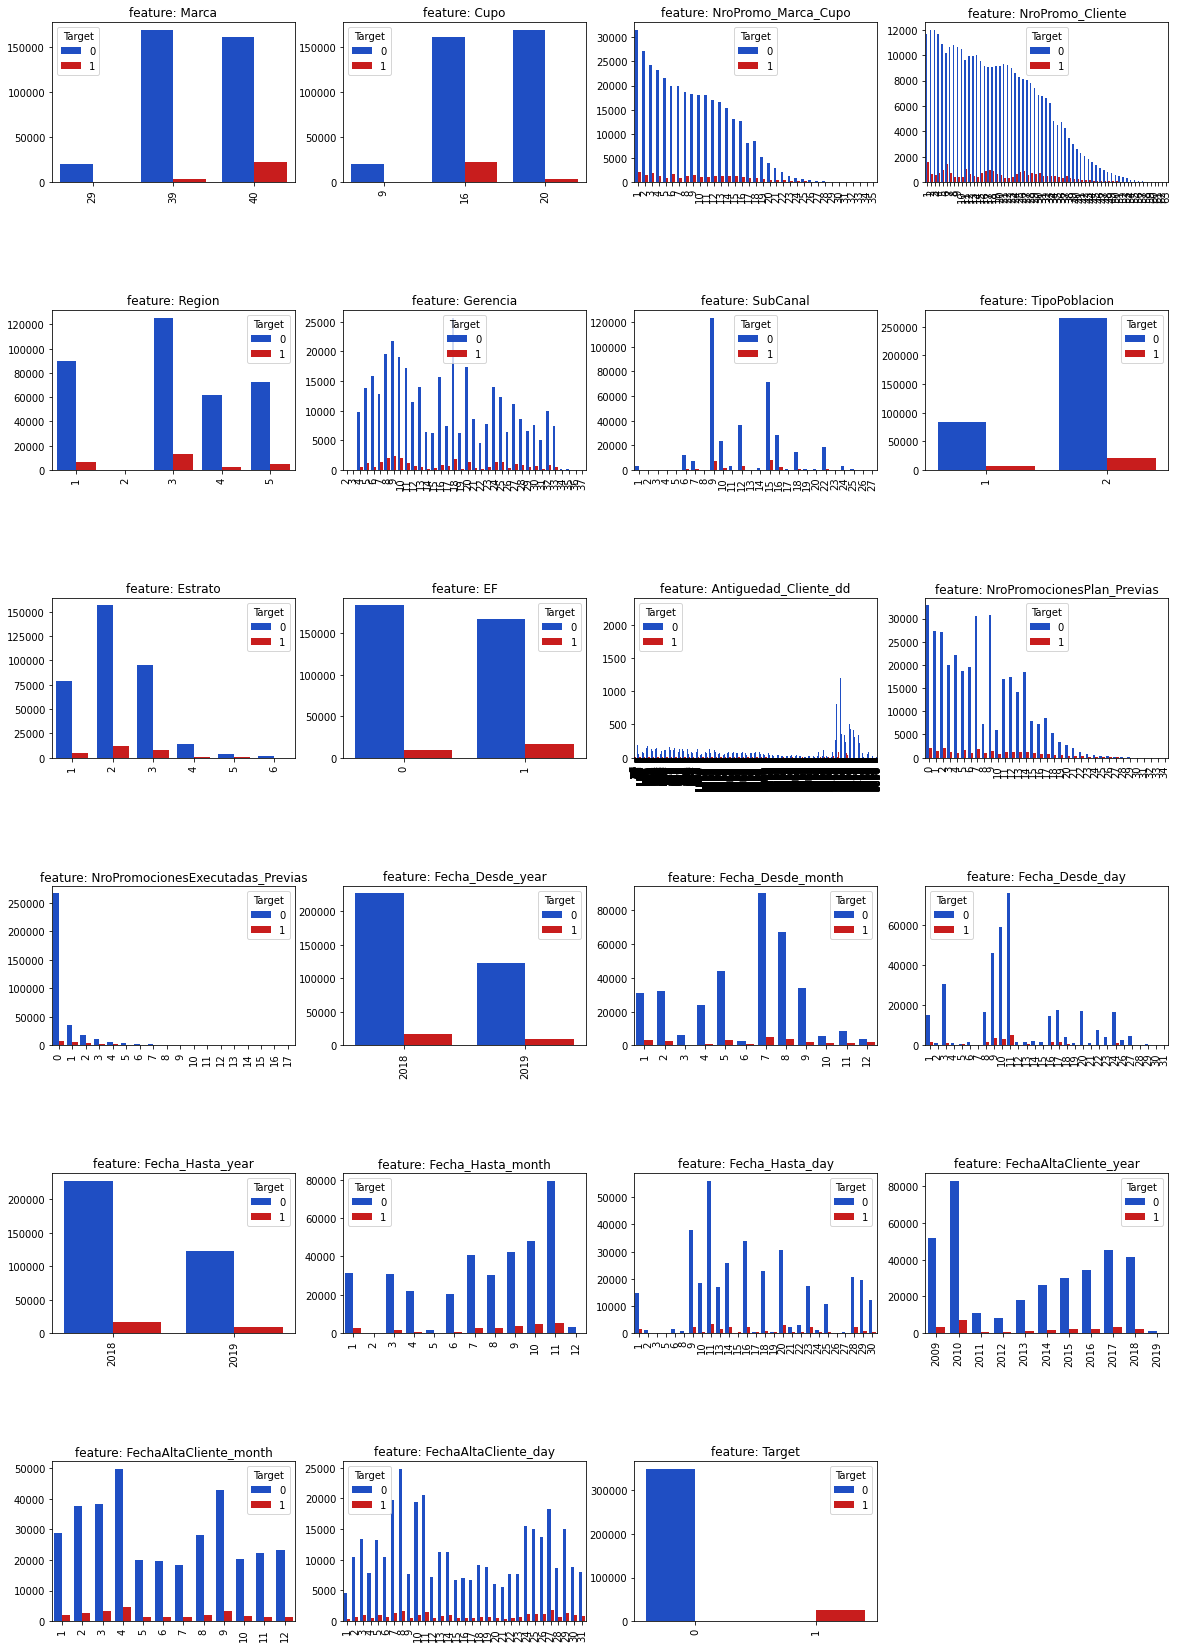

In [97]:
#visualizacion variables categoricas
import matplotlib.gridspec as gridspec
import seaborn as sns

features = DataTrain.drop(['CodigoDC','Fecha_Desde','Fecha_Hasta','Cliente','FechaAltaCliente'],axis=1).columns

plt.figure(figsize=(20,40))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])

    sns.countplot(data=DataTrain, x=f, hue='Target', order=np.sort(DataTrain[f].unique()), palette=sns.xkcd_palette(['blue','red']))
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

In [108]:
####Separamos en X y Y

X=DataTrain.loc[:,['Marca','Cupo','NroPromo_Marca_Cupo','NroPromo_Cliente','Region','Gerencia','SubCanal','TipoPoblacion','Estrato','EF','Antiguedad_Cliente_dd','NroPromocionesPlan_Previas','NroPromocionesExecutadas_Previas','Fecha_Desde_year','Fecha_Desde_month','Fecha_Desde_day','Fecha_Hasta_year','Fecha_Hasta_month','Fecha_Hasta_day',
              'FechaAltaCliente_year','FechaAltaCliente_month','FechaAltaCliente_day']]

y=DataTrain.loc[:,['Target']]

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # (X,y,%test,estratificacion)
                                                    y, 
                                                    test_size=0.30,
                                                    stratify=DataTrain['Target'], ###Dado que la base esta desvalanceada
                                                    random_state=100)

In [ ]:
########################################
# Selección de Variables
########################################

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [111]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=forest.predict(X_train) # Prediccion sobre el train
y_pred_test= forest.predict(X_test) # Prediccion sobre el test

In [113]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[244687     97]
 [   558  17690]]
Matriz confusion: Test
[[103833   1076]
 [  5814   2006]]
Accuracy: Train
0.9975098086924785
Accuracy: Test
0.938879968774672
Precision: Train
0.9945465789621634
Precision: Test
0.6508760545100584
Recall: Train
0.9694213064445418
Recall: Test
0.2565217391304348


In [114]:
importances = forest.feature_importances_     

In [115]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,Antiguedad_Cliente_dd,0.100765
1,NroPromocionesExecutadas_Previas,0.085308
2,NroPromo_Cliente,0.080682
3,FechaAltaCliente_day,0.077829
4,SubCanal,0.071610
5,Gerencia,0.065964
6,Fecha_Desde_month,0.060606
7,FechaAltaCliente_month,0.057968
8,Fecha_Hasta_day,0.056883
9,Estrato,0.051678


In [116]:
########################################
# Modelamiento de los datos
########################################

## Modelos Supervisados : Regresión Logística Binaria ##

# Paso N°01: Llamar un algoritmo predictivos
from sklearn.linear_model import LogisticRegression

RegLog = LogisticRegression() # Paso N°02: Configuro el algoritmo
RegLog.fit(X_train, y_train)  # Paso N°03: Entreno o ajusto el algoritmo predictivo a los datos




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=RegLog.predict(X_train) # Prediccion sobre el train
y_pred_test= RegLog.predict(X_test) # Prediccion sobre el test

In [118]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[243513   1271]
 [ 17620    628]]
Matriz confusion: Test
[[104384    525]
 [  7551    269]]
Accuracy: Train
0.9281798412360474
Accuracy: Test
0.9283591622386431
Precision: Train
0.3307003686150606
Precision: Test
0.33879093198992444
Recall: Train
0.034414730381411664
Recall: Test
0.034398976982097186


In [109]:
X.head(3)

,Marca,Cupo,NroPromo_Marca_Cupo,NroPromo_Cliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroPromocionesPlan_Previas,NroPromocionesExecutadas_Previas,Fecha_Desde_year,Fecha_Desde_month,Fecha_Desde_day,Fecha_Hasta_year,Fecha_Hasta_month,Fecha_Hasta_day,FechaAltaCliente_year,FechaAltaCliente_month,FechaAltaCliente_day
0,39,20,1,1,4,21,12,1,1,1,3473,0,0,2018,5,9,2018,6,9,2009,3,3
1,40,16,1,2,4,21,12,1,1,1,3473,0,0,2018,5,9,2018,6,9,2009,3,3
2,39,20,2,3,4,21,12,1,1,1,3475,1,0,2018,7,9,2018,11,9,2009,3,3


In [107]:
DataTrain.head(3)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,NroPromo_Marca_Cupo,NroPromo_Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroPromocionesPlan_Previas,NroPromocionesExecutadas_Previas,Fecha_Desde_year,Fecha_Desde_month,Fecha_Desde_day,Fecha_Hasta_year,Fecha_Hasta_month,Fecha_Hasta_day,FechaAltaCliente_year,FechaAltaCliente_month,FechaAltaCliente_day,Target
0,355107,39,20,2018-05-09,2018-06-09,1,1,1,2009-03-03,4,21,12,1,1,1,3473,0,0,2018,5,9,2018,6,9,2009,3,3,0
1,355107,40,16,2018-05-09,2018-06-09,1,1,2,2009-03-03,4,21,12,1,1,1,3473,0,0,2018,5,9,2018,6,9,2009,3,3,0
2,357832,39,20,2018-07-09,2018-11-09,1,2,3,2009-03-03,4,21,12,1,1,1,3475,1,0,2018,7,9,2018,11,9,2009,3,3,0


## En Produccion


In [121]:
del DataTest['Target']

In [124]:
del test['Ejecuto_Promo']

In [122]:
DataTest.head(3)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,NroPromo_Marca_Cupo,NroPromo_Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroPromocionesPlan_Previas,NroPromocionesExecutadas_Previas,Fecha_Desde_year,Fecha_Desde_month,Fecha_Desde_day,Fecha_Hasta_year,Fecha_Hasta_month,Fecha_Hasta_day,FechaAltaCliente_year,FechaAltaCliente_month,FechaAltaCliente_day
26,633534,39,20,2019-11-07,2019-07-30,1,14,27,2009-03-03,4,21,12,1,1,1,3782,13,0,2019,11,7,2019,7,30,2009,3,3
27,633534,40,16,2019-11-07,2019-07-30,1,14,28,2009-03-03,4,21,12,1,1,1,3782,13,1,2019,11,7,2019,7,30,2009,3,3
35,671634,40,16,2019-11-09,2019-09-17,1,17,36,2009-03-03,4,21,12,1,1,1,3844,16,1,2019,11,9,2019,9,17,2009,3,3


In [125]:
test.head(3)

,Cliente,Marca,Cupo
0,10,40,16
1,17,29,9
2,37,29,9


In [134]:
result = pd.merge(test, DataTest, how='left', on=['Cliente', 'Marca','Cupo'])

In [135]:
result.head(30)

,Cliente,Marca,Cupo,CodigoDC,Fecha_Desde,Fecha_Hasta,NroPromo_Marca_Cupo,NroPromo_Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroPromocionesPlan_Previas,NroPromocionesExecutadas_Previas,Fecha_Desde_year,Fecha_Desde_month,Fecha_Desde_day,Fecha_Hasta_year,Fecha_Hasta_month,Fecha_Hasta_day,FechaAltaCliente_year,FechaAltaCliente_month,FechaAltaCliente_day
0,10,40,16,633027.0,2019-11-07,2019-07-30,17.0,34.0,2009-03-03,4.0,21.0,15.0,2.0,2.0,0.0,3782.0,16.0,1.0,2019.0,11.0,7.0,2019.0,7.0,30.0,2009.0,3.0,3.0
1,10,40,16,672331.0,2019-11-09,2019-09-17,20.0,43.0,2009-03-03,4.0,21.0,15.0,2.0,2.0,0.0,3844.0,19.0,2.0,2019.0,11.0,9.0,2019.0,9.0,17.0,2009.0,3.0,3.0
2,10,40,16,683251.0,2019-09-22,2019-09-26,21.0,46.0,2009-03-03,4.0,21.0,15.0,2.0,2.0,0.0,3855.0,20.0,2.0,2019.0,9.0,22.0,2019.0,9.0,26.0,2009.0,3.0,3.0
3,17,29,9,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,29,9,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,46,29,9,619035.0,2019-09-05,2019-05-14,2.0,30.0,2009-03-03,4.0,21.0,9.0,2.0,3.0,1.0,3719.0,1.0,0.0,2019.0,9.0,5.0,2019.0,5.0,14.0,2009.0,3.0,3.0
6,48,29,9,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,53,29,9,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,56,29,9,NaN,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,94,39,20,670787.0,2019-11-09,2019-09-17,12.0,26.0,2009-08-05,4.0,22.0,9.0,2.0,3.0,0.0,3778.0,11.0,0.0,2019.0,11.0,9.0,2019.0,9.0,17.0,2009.0,8.0,5.0


In [140]:
result.Region.coun

43597

In [142]:
result.groupby('Region')['Cliente'].count()

Region
1.0    13586
2.0        4
3.0    18916
4.0     2748
5.0     8343
Name: Cliente, dtype: int64

In [143]:
result.isna().sum()

Cliente                                0
Marca                                  0
Cupo                                   0
CodigoDC                            2462
Fecha_Desde                         2462
Fecha_Hasta                         2462
NroPromo_Marca_Cupo                 2462
NroPromo_Cliente                    2462
FechaAltaCliente                    2462
Region                              2462
Gerencia                            2462
SubCanal                            2462
TipoPoblacion                       2462
Estrato                             2462
EF                                  2462
Antiguedad_Cliente_dd               2462
NroPromocionesPlan_Previas          2462
NroPromocionesExecutadas_Previas    2462
Fecha_Desde_year                    2462
Fecha_Desde_month                   2462
Fecha_Desde_day                     2462
Fecha_Hasta_year                    2462
Fecha_Hasta_month                   2462
Fecha_Hasta_day                     2462
FechaAltaCliente

In [136]:
len(result)

46059